<a href="https://colab.research.google.com/github/byongkyu/Detecting-Concrete-Lining-in-Tunnel-GPR-Images/blob/main/YOLOv8/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Sat Jun 22 08:44:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## install YOLOv8

In [ ]:
!pip install --upgrade ultralytics

In [ ]:
import os
from IPython import display
display.clear_output()
!yolo checks

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.2/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


## Import Dataset from RoboFlow

In [ ]:
# Data_set Download

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.38, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to GPR_LINE-12 in yolov8:: 100%|██████████| 1126/1126 [00:06<00:00, 186.88it/s]


## Train the YOLOv8 Model

In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt data='data.yaml' epochs=300 imgsz=640 batch=4

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLOv8_lining/GPR_LINE-12/data.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
!yolo task=segment mode=val model=best.pt data={dataset.location}/data.yaml #change the file path

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 528, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 143, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 329, in check_det_dataset
    raise FileNotFou

## Predictions with Trained YOLOv8 Model on custom Dataset

In [ ]:
!yolo task=segment mode=predict model=best.pt conf=0.8 source={dataset.location}/test/images hide_labels=True show_boxes=False #change the file path


WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

image 1/100 /content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/GPR_LINE-12/test/images/2_S0425-0-S0429-12-5_png.rf.0d437fc5d87dfcba764168f5674dba7a.jpg: 128x640 1 con-lining, 199.2ms
image 2/100 /content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/GPR_LINE-12/test/images/2_S0625-0-0628-12-5_png.rf.a6e384a5a0657470f4416e714475d2f6.jpg: 128x640 1 con-lining, 7.7ms
image 3/100 /content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/GPR_LINE-12/test/images/5_0833-0-0835-4_F_png.rf.56619245e85b2b25c6fca4a7588b8de0.jpg: 128x640 (no detections), 6.9ms
image 4/100 /content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/GPR_LINE-12/test/images/5_S0950-8-0954-10_F_png.rf.d3637802cb1e5

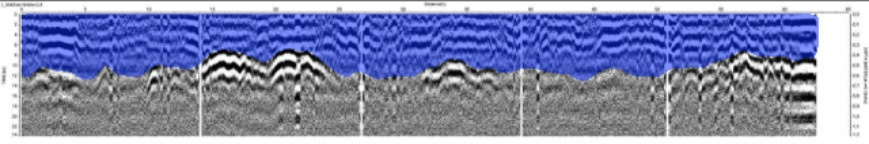

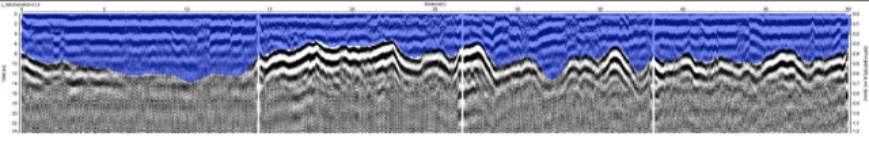

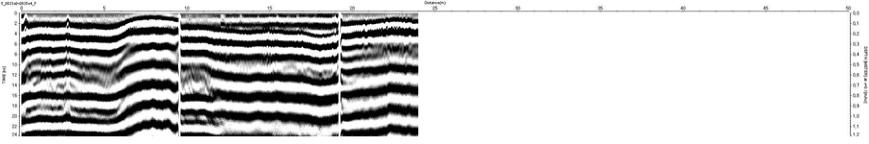

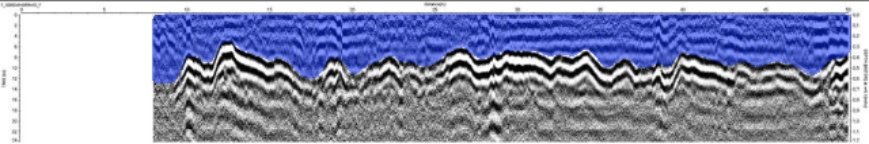

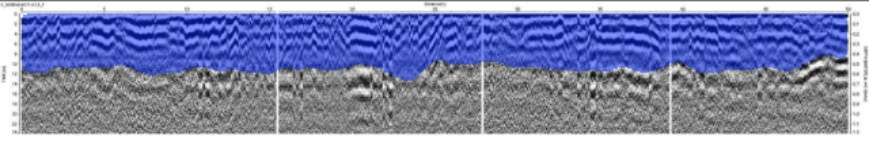

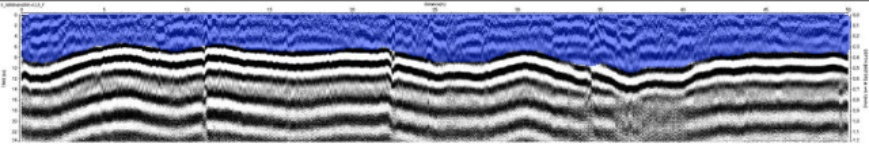

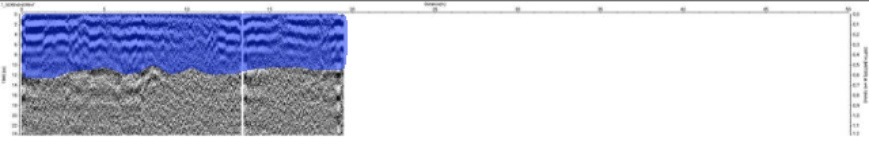

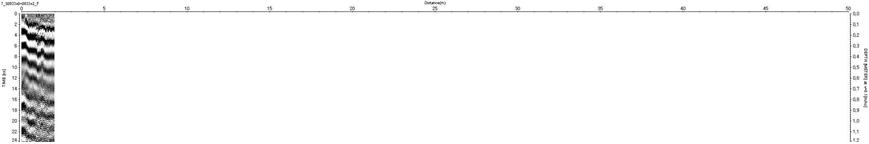

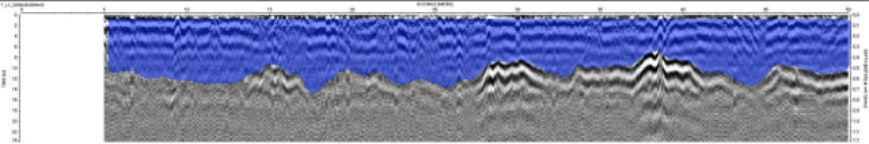

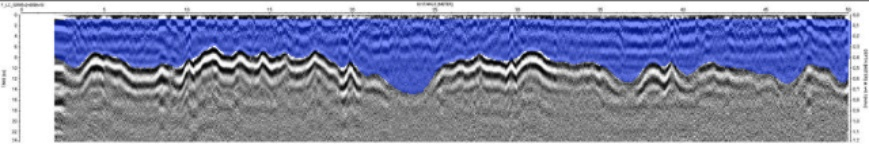

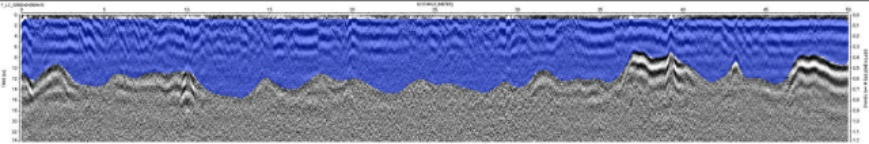

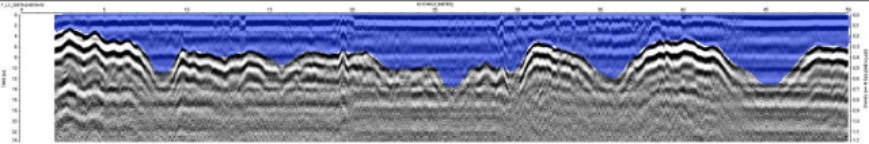

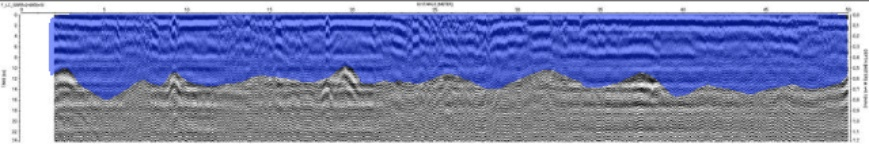

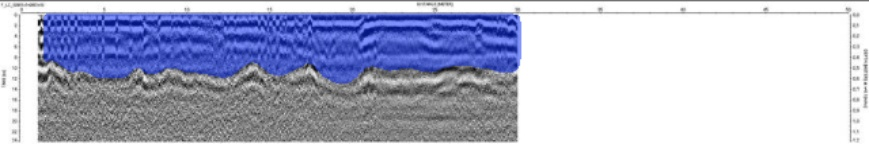

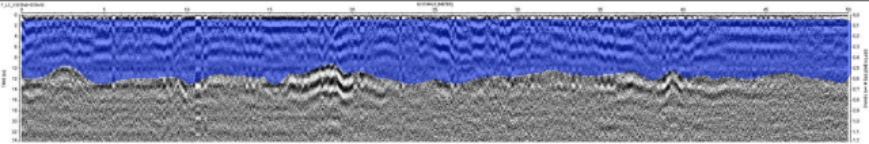

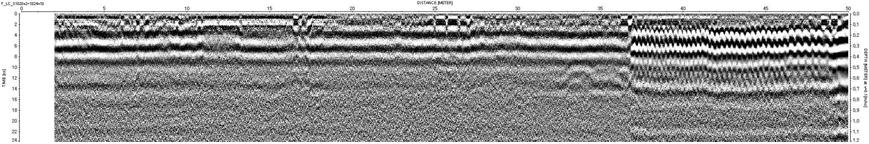

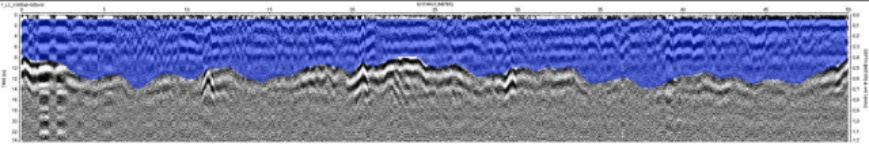

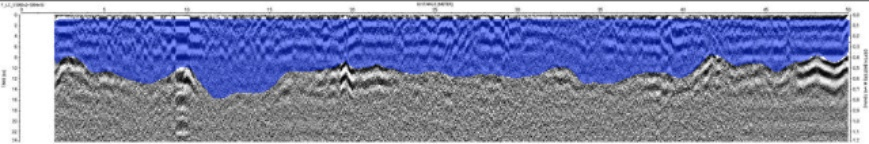

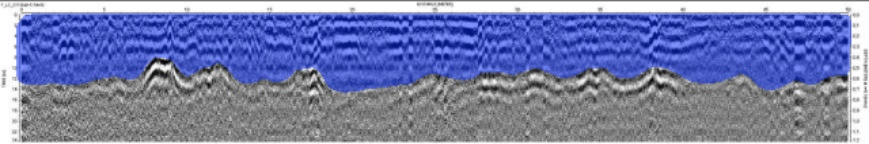

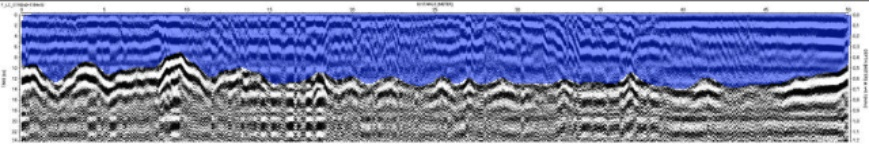

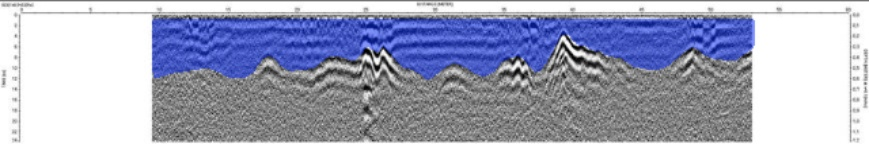

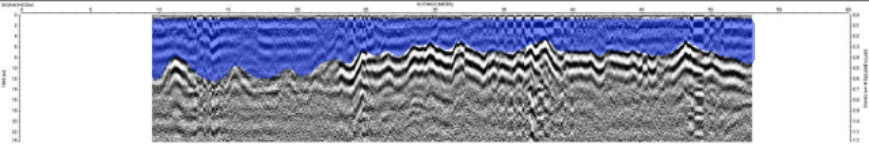

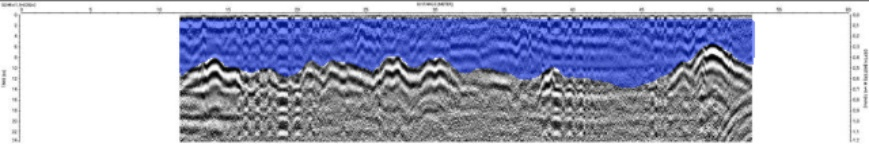

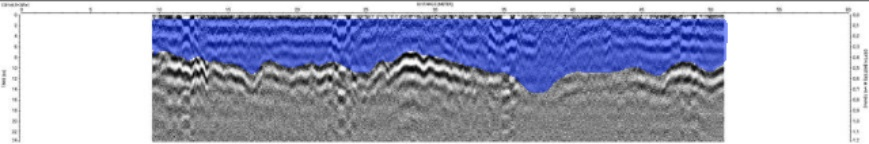

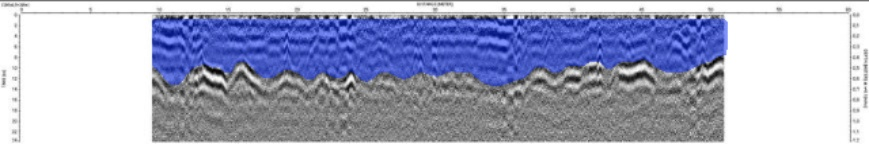

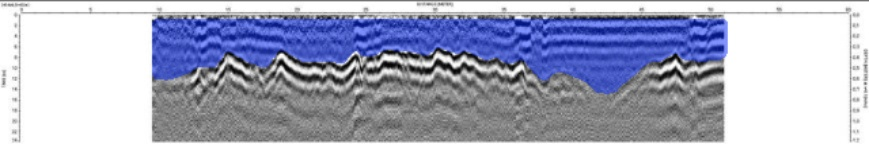

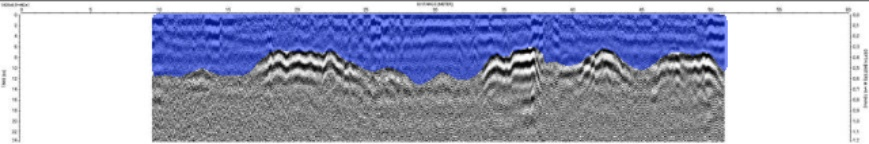

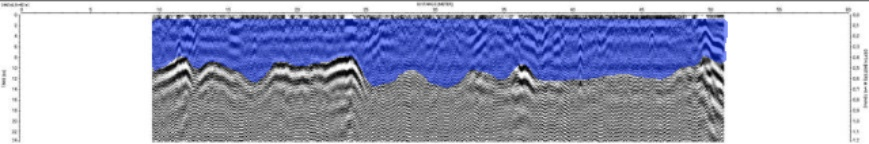

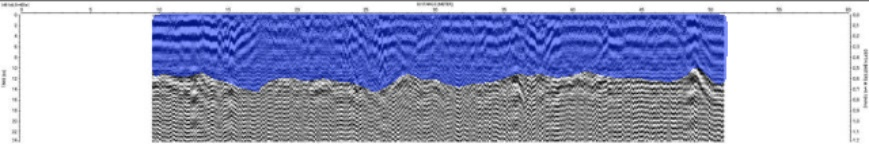

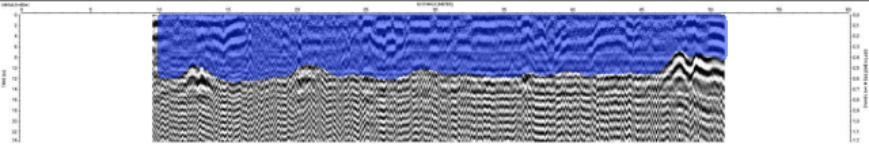

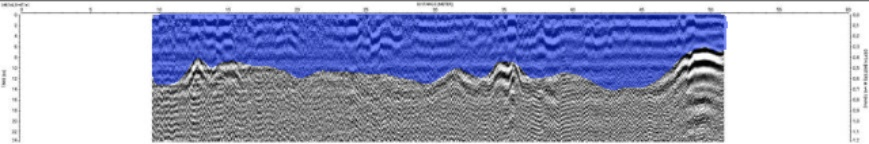

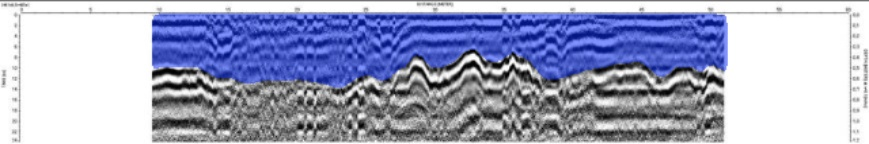

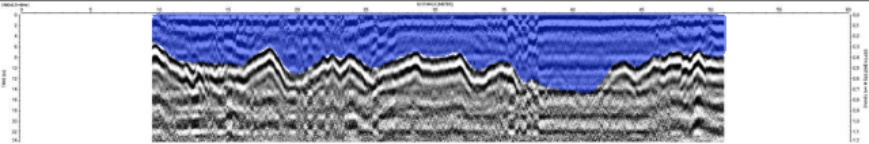

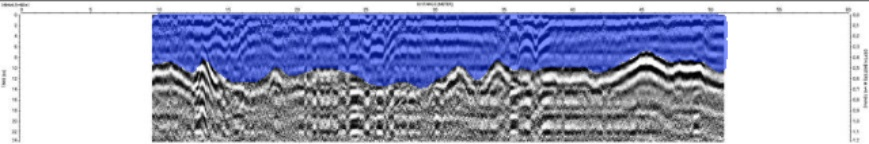

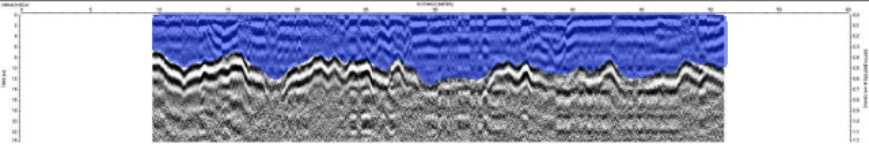

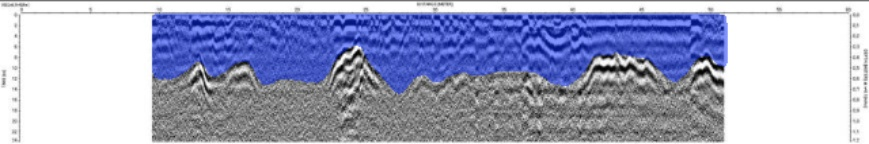

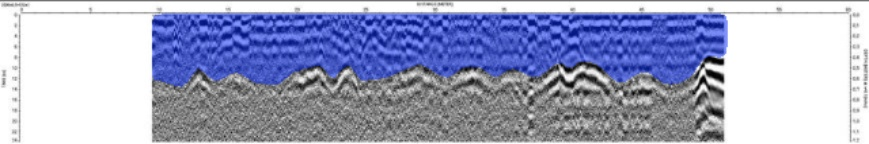

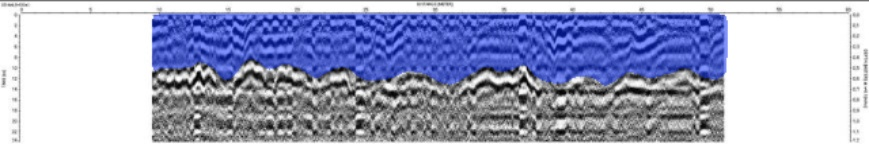

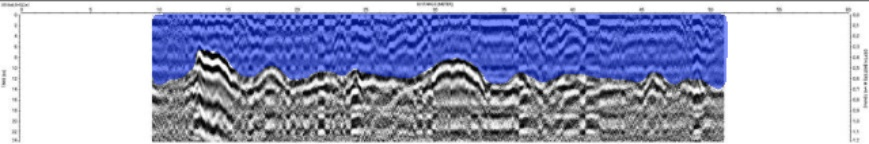

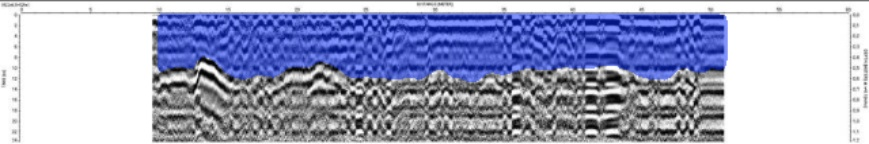

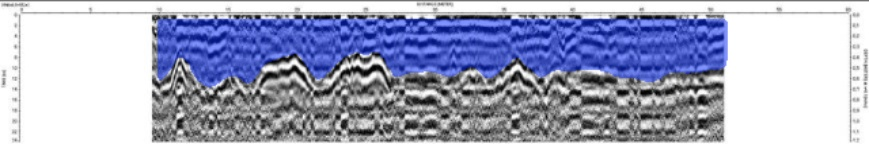

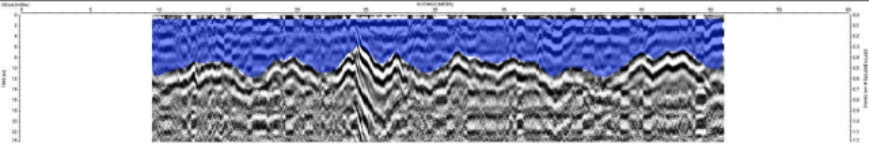

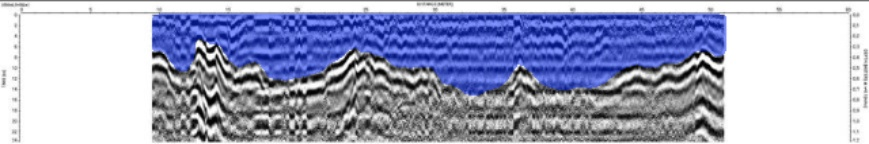

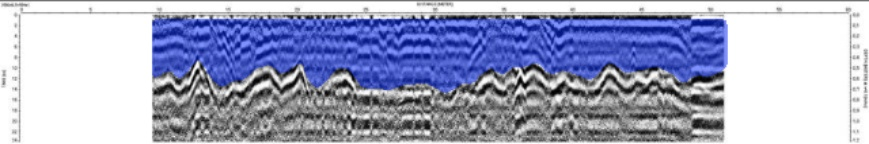

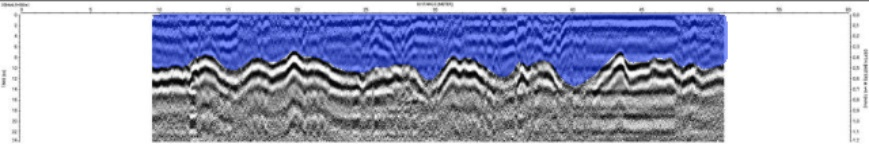

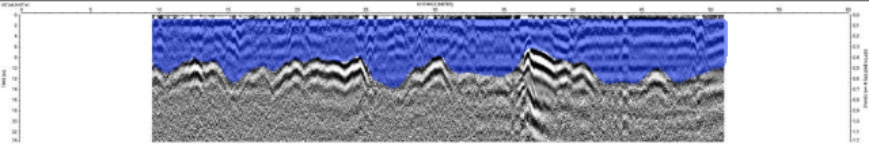

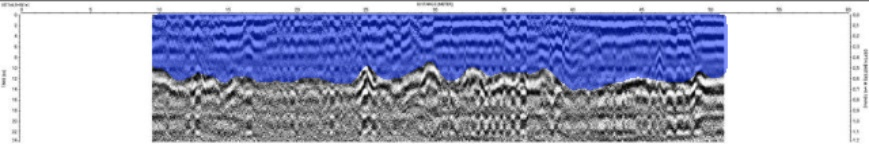

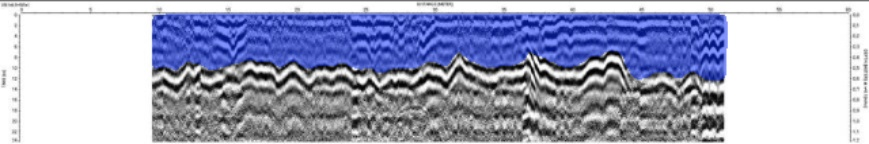

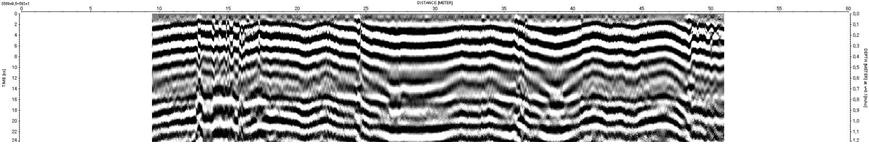

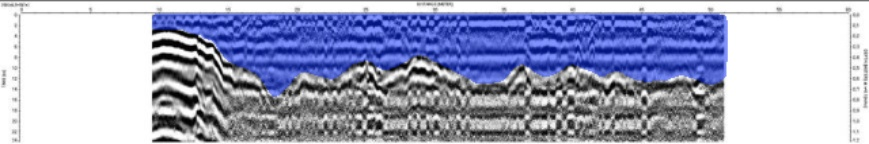

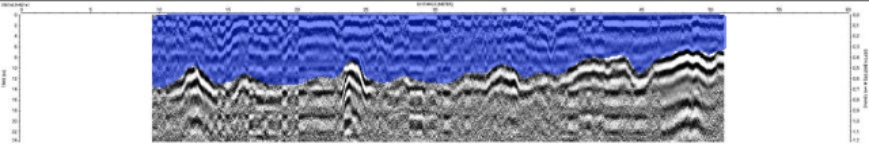

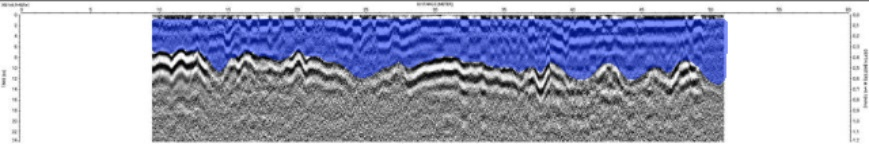

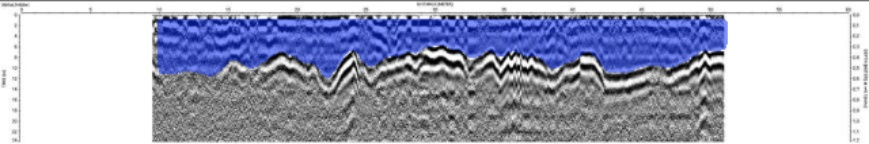

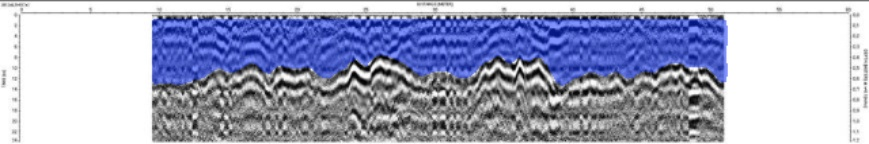

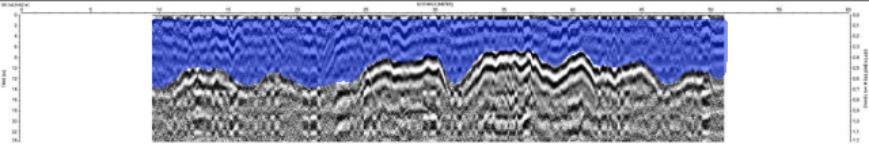

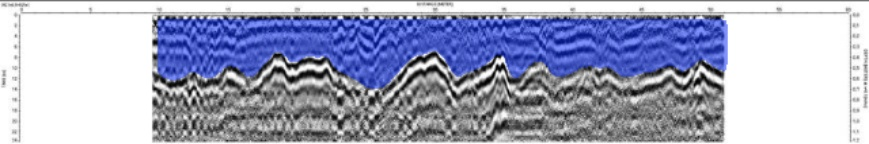

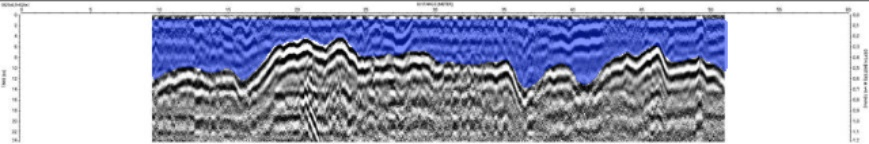

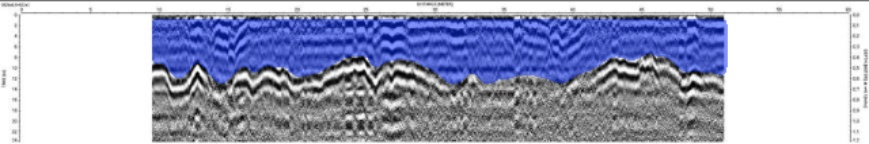

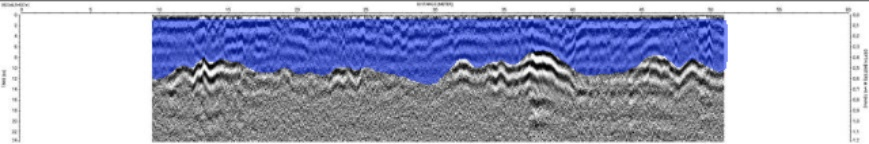

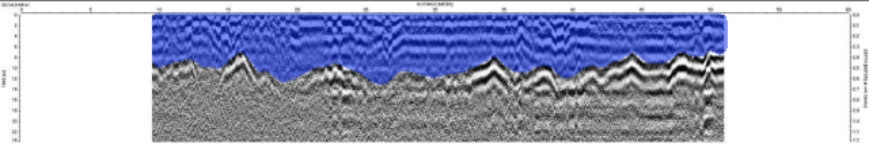

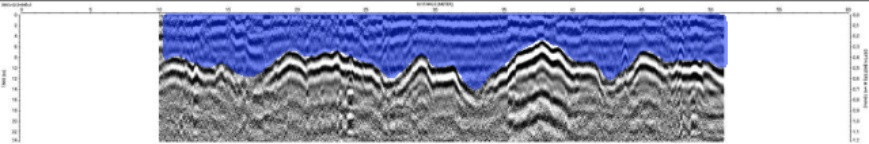

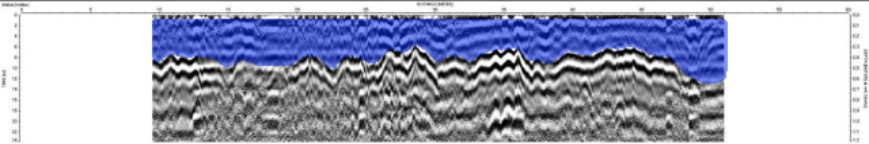

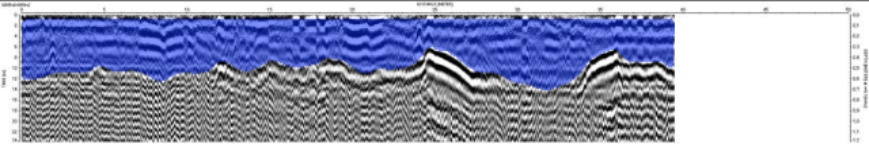

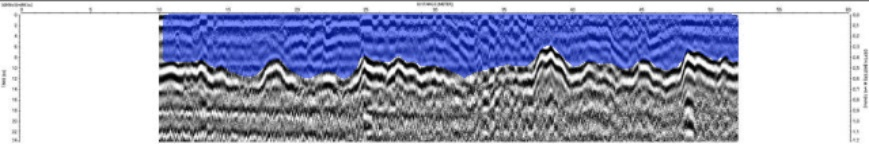

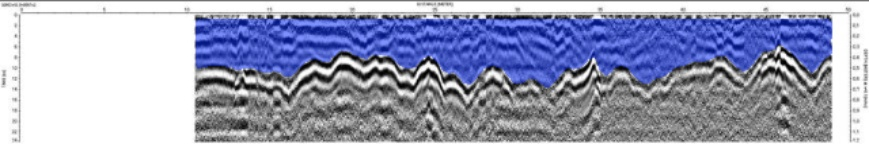

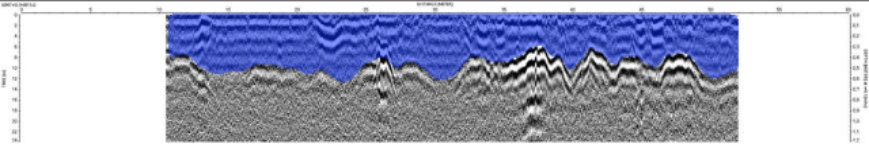

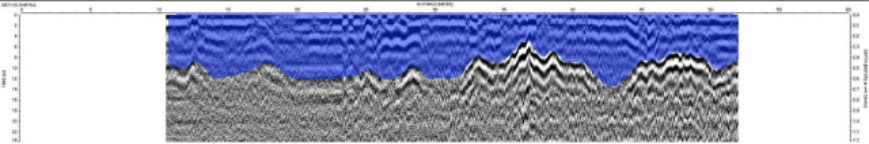

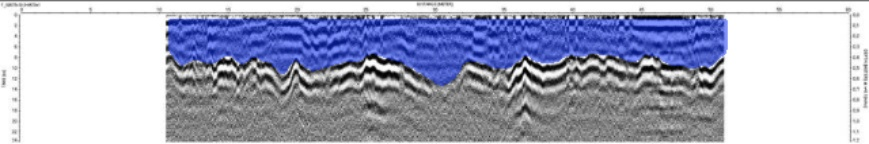

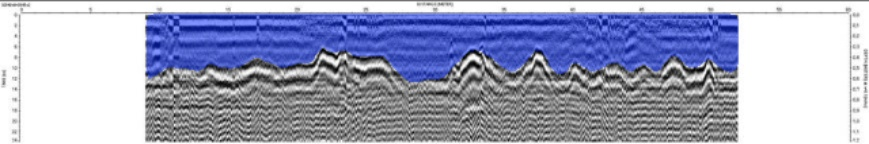

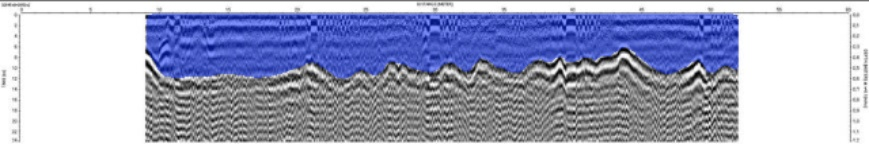

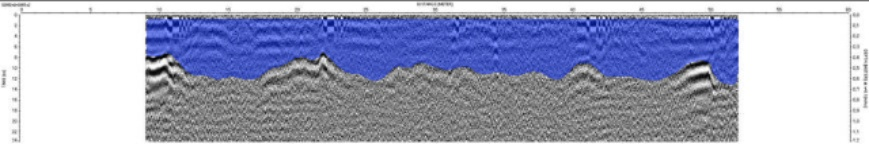

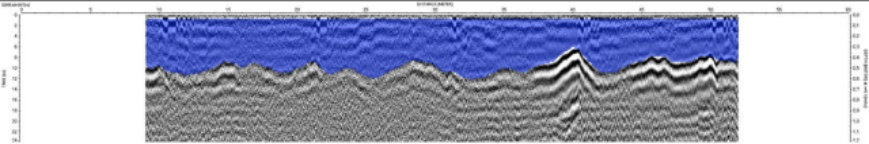

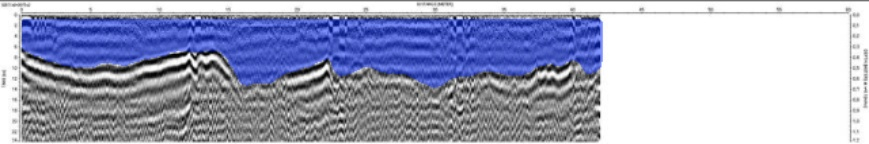

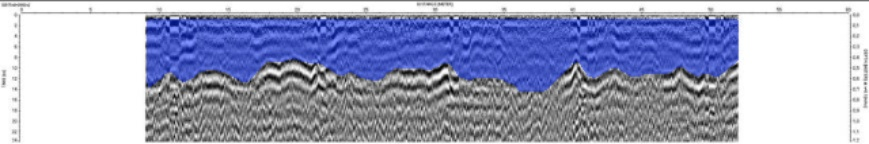

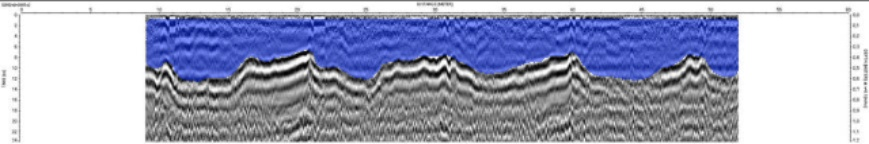

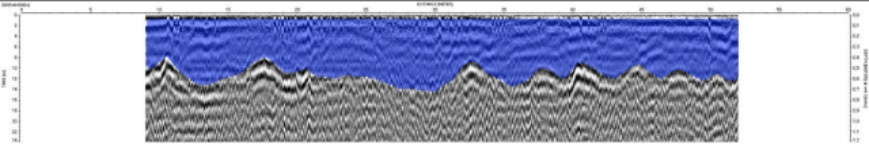

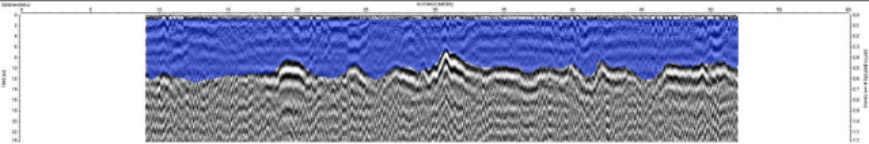

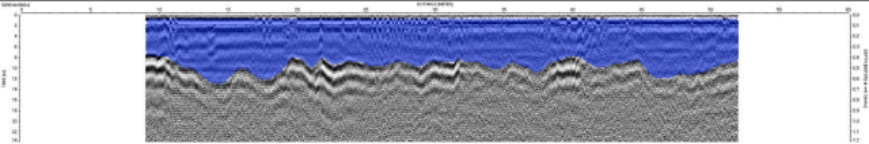

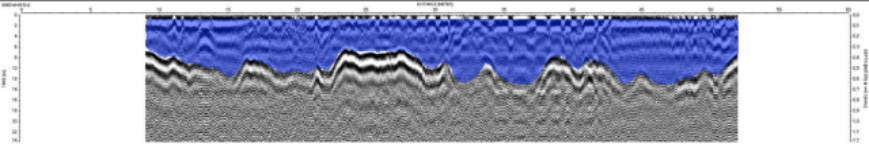

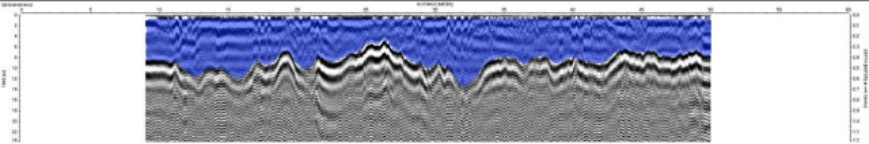

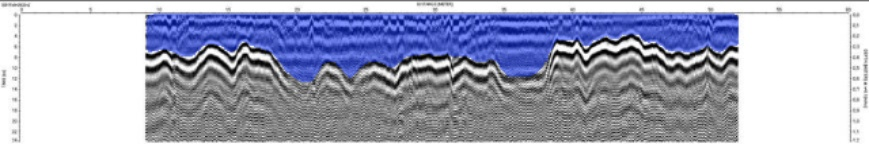

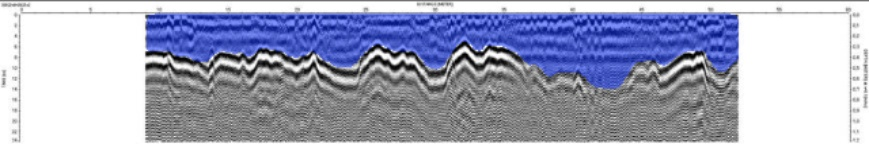

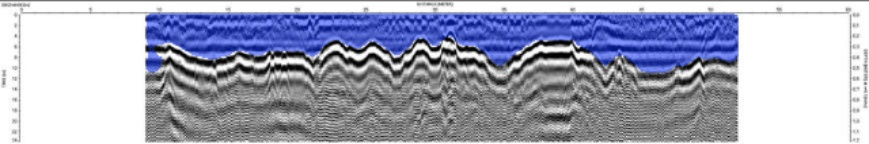

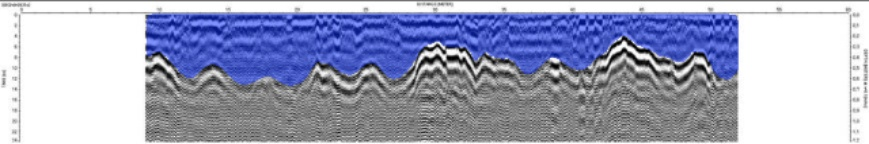

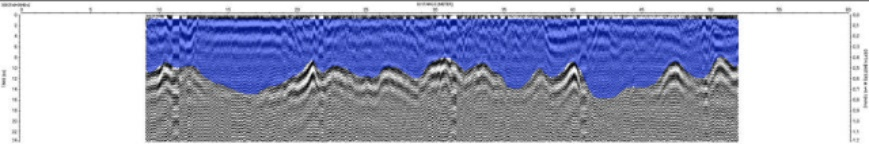

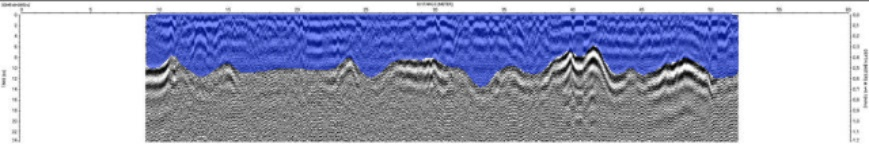

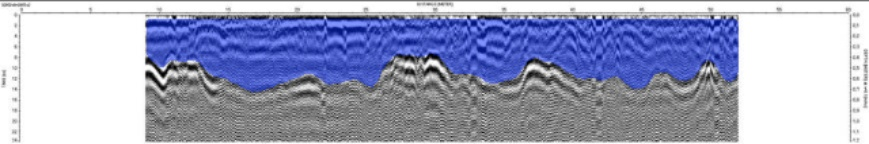

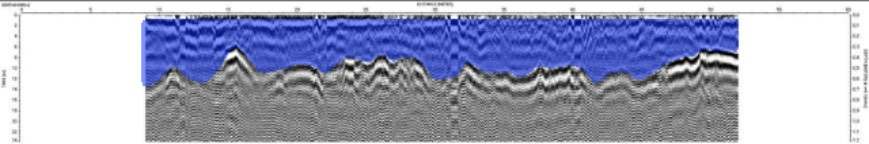

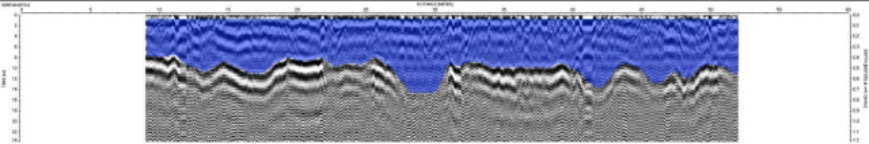

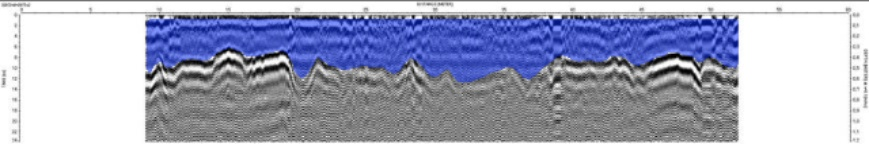

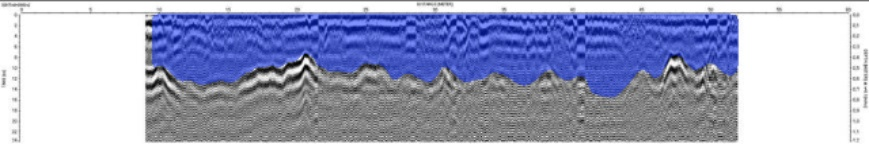

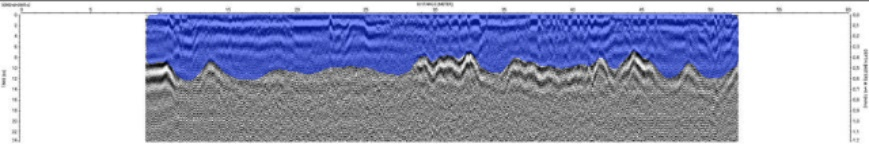

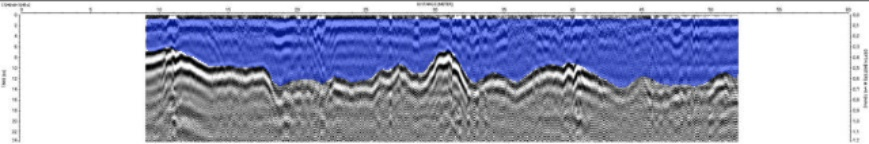

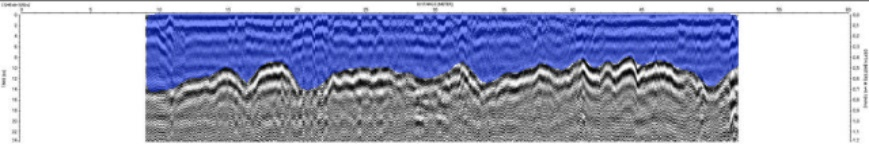

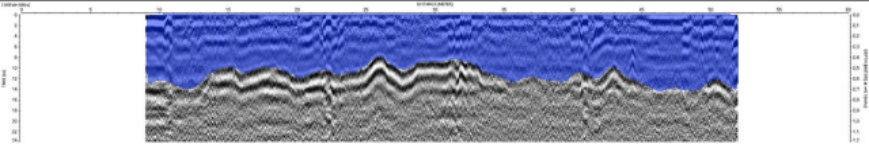

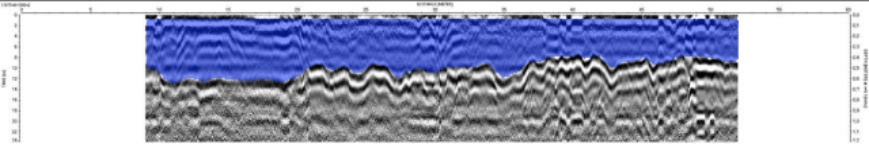

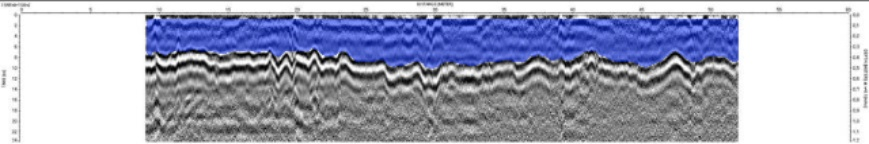

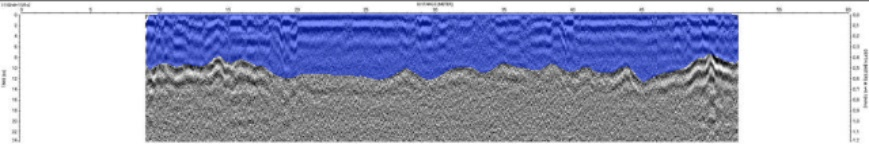

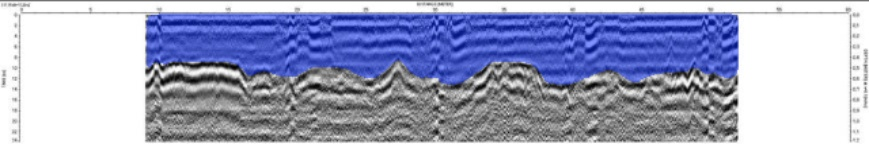

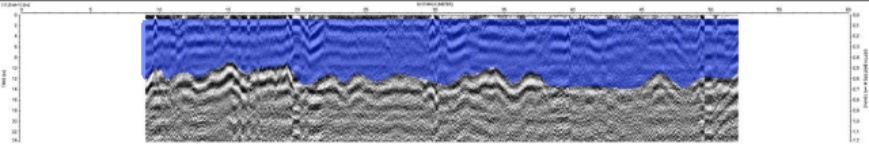

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/runs/segment/predict/*jpg')[:100]: #change the file path
      display(Image(filename=image_path, height=160))
      print("\n")

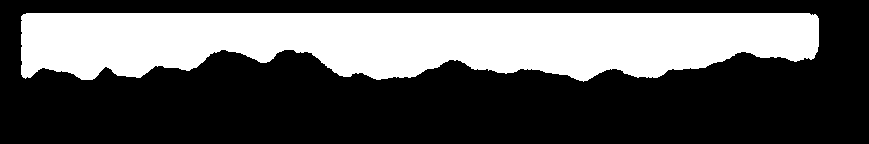

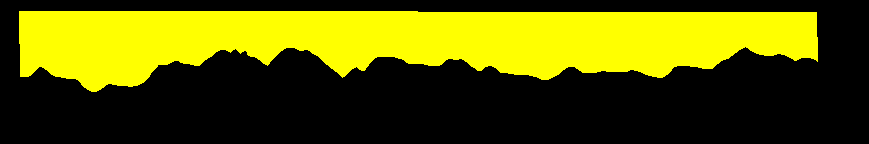

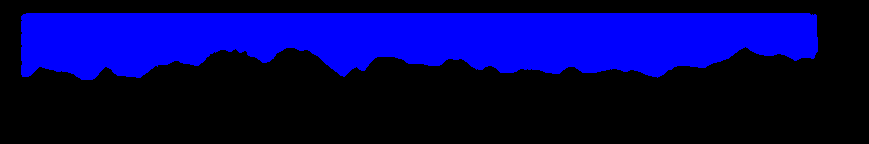

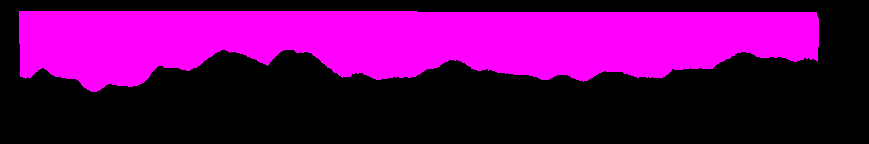

Selected Image: 2_S0425-0-S0429-12-5_png.rf.0d437fc5d87dfcba764168f5674dba7a.jpg
IoU: 0.9411827956989247


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


def read_coordinates_from_txt(file_path, original_width, original_height):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        coordinates = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 1:
                normalized_coords = [float(coord) for coord in parts[1:]]
                polygon = [(int(normalized_coords[i] * original_width), int(normalized_coords[i + 1] * original_height))
                           for i in range(0, len(normalized_coords), 2)]
                coordinates.append(polygon)
    return coordinates

def calculate_iou(detected_polygons, labeled_polygon):
    intersection = cv2.bitwise_and(detected_polygons, labeled_polygon)
    intersection_area = np.count_nonzero(intersection)
    detected_area = np.count_nonzero(detected_polygons)
    label_area = np.count_nonzero(labeled_polygon)

    iou = intersection_area / (detected_area + label_area - intersection_area) if (detected_area + label_area - intersection_area) > 0 else 0
    return iou

def calculate_ious(detected_polygons, unioned_polygons):
    intersection = cv2.bitwise_and(detected_polygons, unioned_polygons)
    intersection_area = np.count_nonzero(intersection)
    unioned_area = np.count_nonzero(unioned_polygons)

    iou = intersection_area / unioned_area if unioned_area > 0 else 0
    return iou


original_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_Final/Images_for_IoU_Text/GPR_LINE.v14i.yolov8/test/images" #change the file path
label_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_Final/Images_for_IoU_Text/GPR_LINE.v14i.yolov8/test/labels" #change the file path
detected_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/runs/segment/predict" #change the file path


selected_image_idx = 0


detected_images = sorted(os.listdir(detected_images_path))
selected_image = os.path.join(detected_images_path, detected_images[selected_image_idx])


detected_image = cv2.imread(selected_image)


selected_label_image_path = os.path.join(label_images_path, detected_images[selected_image_idx].replace(".jpg", ".txt"))
selected_original_image_path = os.path.join(original_images_path, detected_images[selected_image_idx])


label_image = cv2.imread(selected_original_image_path)
label_height, label_width = label_image.shape[:2]


label_coordinates = read_coordinates_from_txt(selected_label_image_path, label_width, label_height)


labeled_image = np.zeros_like(detected_image)


colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 255, 0)]
color_index = 0
for coordinates in label_coordinates:
    pts = np.array(coordinates, np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(labeled_image, [pts], color=colors[color_index])
    color_index = (color_index + 1) % len(colors)


min_blue = np.array([100, 50, 50])
max_blue = np.array([140, 255, 255])
hsv_detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2HSV)
detected_blue = cv2.inRange(hsv_detected_image, min_blue, max_blue)
detected_blue_resized = cv2.resize(detected_blue, (label_width, label_height))
detected_blue_resized_3ch = cv2.merge([detected_blue_resized, detected_blue_resized, detected_blue_resized])
detected_blue_resized_3ch[np.any(detected_blue_resized_3ch > 0, axis=2)] = [255, 255, 255]


intersection_image = cv2.bitwise_and(detected_blue_resized_3ch, labeled_image)
intersection_image[np.any(intersection_image > 0, axis=2)] = [255, 0, 0]


union_image = cv2.bitwise_or(detected_blue_resized_3ch, labeled_image)
union_image[np.any(union_image > 0, axis=2)] = [255, 0, 255]


iou = calculate_ious(detected_blue_resized_3ch, union_image)


cv2_imshow(detected_blue_resized_3ch)
cv2_imshow(labeled_image)
cv2_imshow(intersection_image)
cv2_imshow(union_image)


print(f"Selected Image: {detected_images[selected_image_idx]}")
print(f"IoU: {iou}")


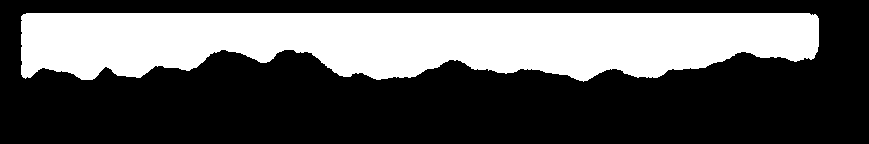

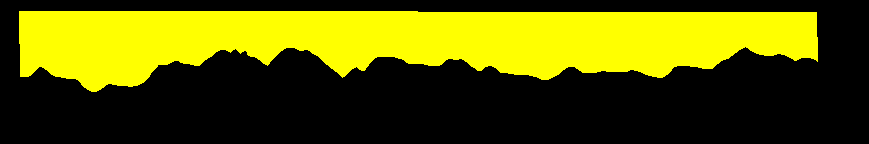

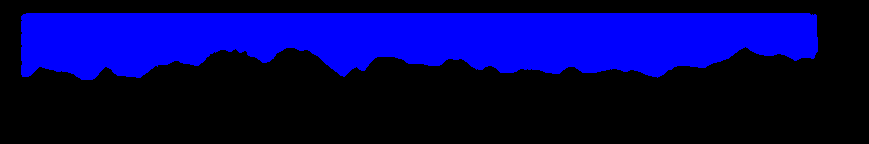

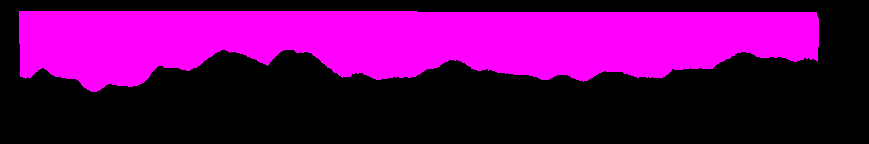

Image 1/100 - 2_S0425-0-S0429-12-5_png.rf.0d437fc5d87dfcba764168f5674dba7a.jpg: IoU: 0.9411827956989247
Image 2/100 - 2_S0625-0-0628-12-5_png.rf.a6e384a5a0657470f4416e714475d2f6.jpg: IoU: 0.9321031632943859
Image 3/100 - 5_0833-0-0835-4_F_png.rf.56619245e85b2b25c6fca4a7588b8de0.jpg: IoU: 0.0
Image 4/100 - 5_S0950-8-0954-10_F_png.rf.d3637802cb1e5e911c4a4e7d6f459cb1.jpg: IoU: 0.9744607273448794
Image 5/100 - 6_S0368-0-0371-12-5_F_png.rf.7e9ca1f2bd33dc9918f4108c5ad9d933.jpg: IoU: 0.9209654519640322
Image 6/100 - 6_S0588-0-0591-12-5_F_png.rf.bcfe04b1704ffdf0407901b2f7fd31e2.jpg: IoU: 0.9972363226170333
Image 7/100 - 7_S0368-0-0369-7_png.rf.de3a5642cd1282ed3a4f77bbda911d0f.jpg: IoU: 0.9533940233524639
Image 8/100 - 7_S0833-0-0833-2_F_png.rf.269589c61d7bb92847cee024ebc94f24.jpg: IoU: 0.0
Image 9/100 - F_LC_S0880-5-0884-10_png.rf.ffabc51f661e55ede8bfbdb70fcc3d8a.jpg: IoU: 0.9299437779450175
Image 10/100 - F_LC_S0895-2-0899-10_png.rf.3ff97395e35ebf3fba592c7387273857.jpg: IoU: 0.891686209592127

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


def read_coordinates_from_txt(file_path, original_width, original_height):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        coordinates = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 1:
                normalized_coords = [float(coord) for coord in parts[1:]]
                polygon = [(int(normalized_coords[i] * original_width), int(normalized_coords[i + 1] * original_height))
                           for i in range(0, len(normalized_coords), 2)]
                coordinates.append(polygon)
    return coordinates


def calculate_iou(detected_polygons, labeled_polygon):
    intersection = cv2.bitwise_and(detected_polygons, labeled_polygon)
    intersection_area = np.count_nonzero(intersection)
    detected_area = np.count_nonzero(detected_polygons)
    label_area = np.count_nonzero(labeled_polygon)

    iou = intersection_area / (detected_area + label_area - intersection_area) if (detected_area + label_area - intersection_area) > 0 else 0
    return iou

def calculate_ious(detected_polygons, unioned_polygons):
    intersection = cv2.bitwise_and(detected_polygons, unioned_polygons)
    intersection_area = np.count_nonzero(intersection)
    unioned_area = np.count_nonzero(unioned_polygons)

    iou = intersection_area / unioned_area if unioned_area > 0 else 0
    return iou


original_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_Final/Images_for_IoU_Text/GPR_LINE.v14i.yolov8/test/images" #change the file path
label_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_Final/Images_for_IoU_Text/GPR_LINE.v14i.yolov8/test/labels" #change the file path
detected_images_path = "/content/drive/MyDrive/GPR_Concrete_Lining_YOLO_FINAL/runs/segment/predict" #change the file path


detected_images = sorted(os.listdir(detected_images_path))


total_iou = 0.0
num_images = len(detected_images)
for idx, detected_image_file in enumerate(detected_images):
    detected_image_path = os.path.join(detected_images_path, detected_image_file)
    detected_image = cv2.imread(detected_image_path)

    label_image_path = os.path.join(label_images_path, detected_image_file.replace(".jpg", ".txt"))
    original_image_path = os.path.join(original_images_path, detected_image_file)

    label_image = cv2.imread(original_image_path)
    label_height, label_width = label_image.shape[:2]

    label_coordinates = read_coordinates_from_txt(label_image_path, label_width, label_height)
    labeled_image = np.zeros_like(detected_image)

    colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 255, 0)]
    color_index = 0
    for coordinates in label_coordinates:
        pts = np.array(coordinates, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.fillPoly(labeled_image, [pts], color=colors[color_index])
        color_index = (color_index + 1) % len(colors)


    min_blue = np.array([100, 50, 50])
    max_blue = np.array([140, 255, 255])
    hsv_detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2HSV)
    detected_blue = cv2.inRange(hsv_detected_image, min_blue, max_blue)
    detected_blue_resized = cv2.resize(detected_blue, (label_width, label_height))
    detected_blue_resized_3ch = cv2.merge([detected_blue_resized, detected_blue_resized, detected_blue_resized])
    detected_blue_resized_3ch[np.any(detected_blue_resized_3ch > 0, axis=2)] = [255, 255, 255]


    intersection_image = cv2.bitwise_and(detected_blue_resized_3ch, labeled_image)
    intersection_image[np.any(intersection_image > 0, axis=2)] = [255, 0, 0]


    union_image = cv2.bitwise_or(detected_blue_resized_3ch, labeled_image)
    union_image[np.any(union_image > 0, axis=2)] = [255, 0, 255]


    iou = calculate_ious(detected_blue_resized_3ch, union_image)
    total_iou += iou


    if idx == selected_image_idx:
        cv2_imshow(detected_blue_resized_3ch)
        cv2_imshow(labeled_image)
        cv2_imshow(intersection_image)
        cv2_imshow(union_image)

    print(f"Image {idx + 1}/{num_images} - {detected_image_file}: IoU: {iou}")


average_iou = total_iou / num_images
print(f"Average IoU: {average_iou}")
